In [1]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif,RFE,RFECV,SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
res = {
    "scale_Robust": {
        "column_1": [],
        "column_2": [],
        "column_3": [],
        'model': pd.read_csv('scale_Robust.csv')
        
        },
    
    "scaled_min_sklearn": {
        "column_1": [],
        "column_2": [],
        "column_3": [],
        'model': pd.read_csv('scale_min_sklearn.csv')
        },
    "scale_standard":{
        "column_1": [],
        "column_2": [],
        "column_3": [],
        'model': pd.read_csv('scale_standard.csv')
        },
    
}

In [49]:
def select_beat_feature(i,res,k,x,y):
    selector = SelectKBest(score_func=f_classif, k=k)  # Select top 5 features
    X_new = selector.fit_transform(x, y)
    selected_indices = selector.get_support(indices=True)
    selected_feature_names = list(x.columns[selected_indices])
    print(selected_feature_names)
    res[i]['column_1'] = selected_feature_names
    # plot the scores of 12 best features
    plt.figure(figsize=(10, 6))
    # make horizontal bar chart
    # add grid line
    sns.barplot(x=selector.scores_[selected_indices] , y=selected_feature_names, palette='Blues_d')
    plt.title("Scores of top 12 features (SelectKBest)")
    plt.xlabel("Scores")
    plt.ylabel("Features")
    plt.show()

In [52]:
def rfe_feature(i,res,k,x,y):
    model = RandomForestClassifier(n_estimators=100)
    selector = SelectFromModel(model,max_features=k)
    selector.fit(x, y)
    selected_indices = selector.get_support(indices=True)
    selected_feature_names = list(x.columns[selected_indices])
    res[i]['column_2'] = selected_feature_names
    # plot graph of feature importances for better visualization
    plt.figure(figsize=(10, 6))
    # make horizontal bar chart
    # add grid line
    sns.barplot(x=selector.estimator_.feature_importances_[selected_indices] , y=selected_feature_names, palette='Blues_d')
    plt.title("Scores of top 12 features (SelectFromModel)")
    plt.xlabel("Scores")
    plt.ylabel("Features")
    plt.show()
    
    return selector
        

In [55]:
def random_selection(i,res,k,x,y):
    model = RandomForestClassifier(n_estimators=100)
    rfecv = RFECV(model, step=1, cv=5, scoring='accuracy',min_features_to_select=k)
    rfecv.fit(x, y)
    selected_feature_indices = rfecv.support_
    selected_feature_names = list(x.columns[selected_feature_indices])
    res[i]['column_3'] = selected_feature_names
    # plot graph of feature importances for better visualization
    return rfecv
    

In [56]:
scaled = pd.read_csv('../csv/credit_score_clean_extraction.csv')
res = {'extract':{
    "column_1": [],
        "column_2": [],
        "column_3": [],
}}
# for i in res:
#     try:

features=[
    "Interest_Rate",
    "Credit_History_Age",
    "Credit_Mix",
    'Type_of_Loan',
    "Interest_Loan_Interaction",
    "Outstanding_Debt",
    "Num_Credit_Card",
    "Net_Monthly_Savings",
]
x = scaled.drop(columns=['Credit_Score'])
y = scaled["Credit_Score"]
# select_beat_feature('extract',res,12,x,y)
# selector = rfe_feature('extract',res,12,x,y)
rfecv = random_selection('extract',res,12,x,y)
    # except:
    #     print(i,"error")
    #     continue
# check if all column are same

    
    
    
    



AttributeError: 'SelectFromModel' object has no attribute 'grid_scores_'

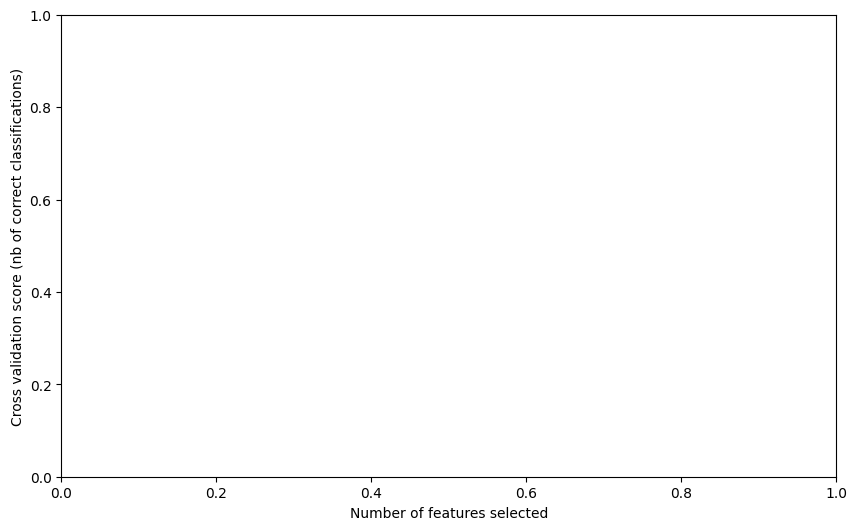

In [16]:
# plot selected feature distribution from selector
plt.figure(figsize=(10, 6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_)
plt.show()


In [22]:
column_1 = res['extract']['column_1']
result =[]
for i in column_1:
    if i in res['extract']['column_2'] and i in res['extract']['column_3']:
        result.append(i)
print(result)

['Interest_Rate', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Credit_Mix', 'Outstanding_Debt', 'Credit_History_Age']


In [14]:
# check which column are max more than 10000
print(scaled.describe())

                 Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
count  100000.000000  100000.000000          100000.000000      100000.000000   
mean       19.316340    6242.960000            6623.226210           5.368820   
std        10.764812    3604.708348            3823.690014           2.593314   
min         0.000000       0.000000               0.000000           0.000000   
25%        10.000000    3121.750000            3314.000000           3.000000   
50%        19.000000    6241.500000            6621.000000           5.000000   
75%        28.000000    9365.250000            9932.000000           7.000000   
max        42.000000   12487.000000           13240.000000          11.000000   

       Num_Credit_Card  Interest_Rate    Num_of_Loan  Delay_from_due_date  \
count    100000.000000   100000.00000  100000.000000         100000.00000   
mean          5.533570       13.53208       3.532880             21.08141   
std           2.067098        8.74133  

In [12]:
# del res['scale_min_max']
# for i in res:
#     del res[i]['model']
    
with open('feature_selected.json', 'w') as fp:
    json.dump(res, fp)

In [13]:
loads = res.copy()
commons_1= loads['scale_Robust']['column_1']
commons_2= loads['scale_Robust']['column_2']
commons_3= loads['scale_Robust']['column_3']
for i in loads:
    column_1 = loads[i]['column_1']
    column_2 = loads[i]['column_2']
    column_3 = loads[i]['column_3']
    # extract what is common in all three
    common = list(set(column_1) & set(column_2) & set(column_3))
    loads[i]['common'] = common
    commons_1 = list(set(commons_1) & set(column_1))
    commons_2 = list(set(commons_2) & set(column_2))
    commons_3 = list(set(commons_3) & set(column_3))
loads['common_1'] = list(commons_1)
loads['common_2'] = list(commons_2)
loads['common_3'] = list(commons_3)

common = []
for i in commons_1:
    if i in commons_2 or i in commons_3:
        common.append(i)
loads['common'] = common

print(loads)
with open('feature_selected_2.json', 'w') as fp:
    json.dump(loads, fp)
        
    

{'scale_Robust': {'column_1': ['Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Interest_Loan_Interaction'], 'column_2': ['Annual_Income', 'Monthly_Inhand_Salary', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix', 'Payment_of_Min_Amount', 'Net_Monthly_Savings', 'Interest_Loan_Interaction'], 'column_3': ['Credit_Mix', 'Outstanding_Debt', 'Credit_History_Age', 'Interest_Rate', 'Delay_from_due_date', 'Interest_Loan_Interaction', 'Monthly_Balance', 'Month', 'Credit_Utilization', 'Credit_Utilization_Ratio', 'Changed_Credit_Limit', 'Num_Credit_Inquiries'], 'common': ['Interest_Rate', 'Num_Credit_Inquiries', 'Delay_from_due_date', 'Credit_Mix', 'Interest_Loan_Interaction']}, 'scaled_min_sklearn': {'column_1': ['Num_Bank_Accounts', 'N